In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# JupyterNotebook上でグラフを表示する設定
%matplotlib inline
# DataFrameで全ての列を表示する設定
pd.options.display.max_columns = None

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

In [3]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [4]:
print(iris["DESCR"])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [5]:
# data:説明変数
print(iris["data"].shape)
print(type(iris["data"]))
print(iris["data"])

(150, 4)
<class 'numpy.ndarray'>
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4

In [6]:
# feature_name:説明変数の列名
iris["feature_names"]

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [7]:
# target:目的変数
print(iris["target"].shape)
print(type(iris["target"]))
print(iris["target"])

(150,)
<class 'numpy.ndarray'>
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [8]:
iris["target_names"]

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [9]:
# irisのfeature_namesは「sepal length(cm)」のように空白やカッコが付いていて扱いづらいので以下の列名を使用する
feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

# datasetの作成
dataset = pd.DataFrame(data = iris['data'], columns = feature_names)
dataset['species'] = iris['target']
dataset.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [10]:
iris['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

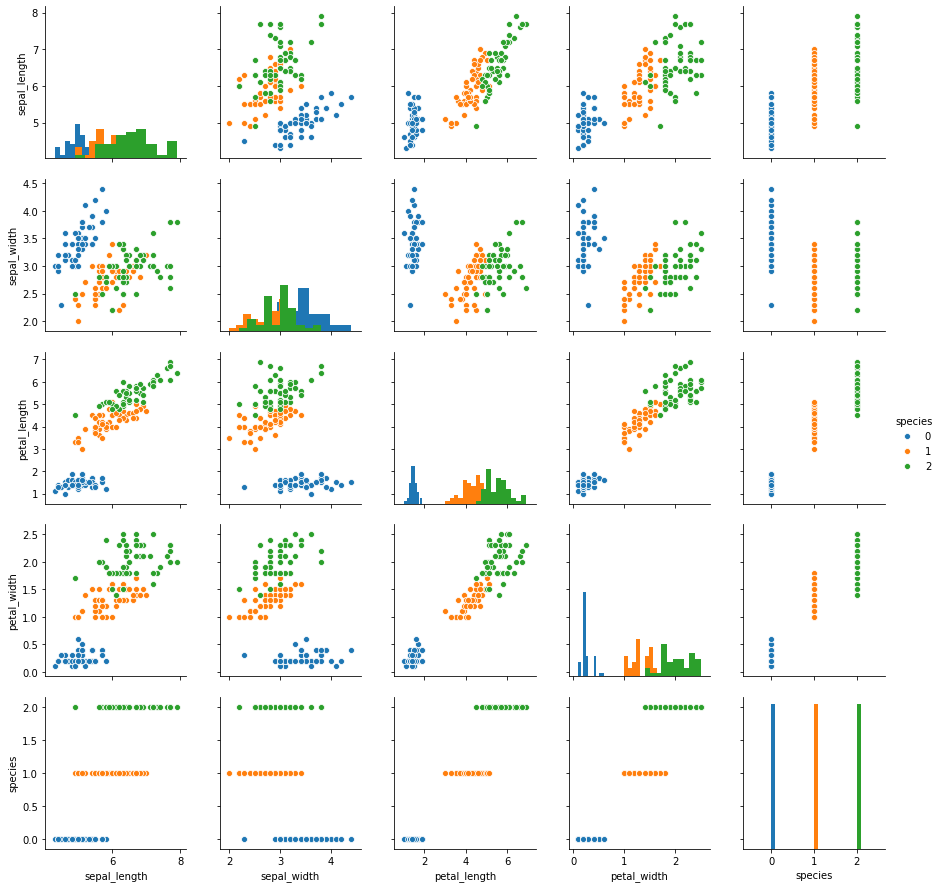

In [11]:
# グラフによる可視化
sns.pairplot(dataset, hue='species', diag_kind='hist')

In [12]:
# setosaかそれ以外か
is_setosa = (dataset["species"] == 0).astype(np.int64)

# datasetに追加
dataset["is_setosa"] = is_setosa
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species,is_setosa
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1


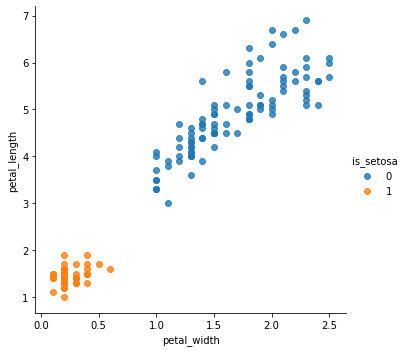

In [13]:
sns.lmplot(x="petal_width", y="petal_length", hue="is_setosa", data=dataset, fit_reg=False)

In [14]:
# 必要なライブラリの読み込み
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split

In [15]:
# 目的変数(Y)：is_setosa, 説明変数(X)：petal_widthとpetal_length
Y = np.array(dataset["is_setosa"])
X = np.array(dataset[["petal_width", "petal_length"]])

In [16]:
# 形状を確認
print("Y=", Y.shape, "X=", X.shape)

Y= (150,) X= (150, 2)


In [17]:
# データの分割
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
X_train, X_valid, Y_train, Y_valid = train_test_split(X, Y, test_size=0.3, random_state=0)

In [18]:
# パーセプトロン
perceptron_model = Perceptron()
perceptron_model.fit(X_train, Y_train)
Y_pred = perceptron_model.predict(X_valid)

In [19]:
print(Y_valid[:5])
print(Y_pred[:5])

[0 0 1 0 1]
[0 0 1 0 1]


In [20]:
# 切片
w1 = perceptron_model.intercept_
# 係数
w2 = perceptron_model.coef_[0]

print("w1=", w1, "w2=", w2)

w1= [3.] w2= [-1.1 -0.6]


(0, 7.5)

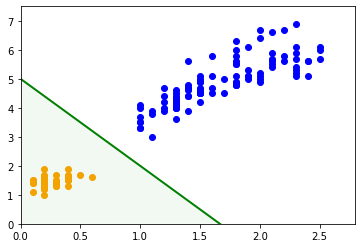

In [21]:
# モデルの式
x1 = np.linspace(0, 3, 10)
x2 = 3 / 0.6 - 3 * x1

# 実際の値(setosa)
data = dataset.query("is_setosa == 1")
plt.scatter(data["petal_width"], data["petal_length"], color="orange")

# 実際の値(setosa以外)
data = dataset.query("is_setosa == 0")
plt.scatter(data["petal_width"], data["petal_length"], color="blue")

# モデルの式(setosaの部分)
plt.plot(x1, x2, color="green", linewidth=2)
plt.fill_between(x1, x2, color="green", linewidth=0, alpha=.05)

# グラフ全体の大きさを指定
plt.xlim(0, 2.8)
plt.ylim(0, 7.5)


In [22]:
# 正解率
from sklearn.metrics import accuracy_score

accuracy_score(Y_valid, Y_pred)

1.0

In [23]:
# モデルのスコア関数による正解率
perceptron_model.score(X_valid, Y_valid)

1.0

In [24]:
# 適合率
from sklearn.metrics import precision_score

precision_score(Y_valid, Y_pred)

1.0

In [25]:
from sklearn.metrics import recall_score

recall_score(Y_valid, Y_pred)

1.0

In [26]:
from sklearn.metrics import f1_score

f1_score(Y_valid, Y_pred)

1.0

In [27]:
from sklearn.metrics import classification_report

print(classification_report(Y_valid, Y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        16

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
# 目的変数(Y):is_setosa、説明変数(X):petal_widthとpetal_length
Y = np.array(dataset["is_setosa"])
X = np.array(dataset[["petal_width", "petal_length"]])

In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
X_train, X_valid, Y_train, Y_valid = train_test_split(X, Y, test_size=0.3, random_state=0)

In [31]:
# ロジスティック回帰
logistic_model = LogisticRegression(solver="lbfgs")
logistic_model.fit(X_train, Y_train)
Y_pred = logistic_model.predict(X_valid)

# モデルの評価
print(classification_report(Y_valid, Y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        16

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [32]:
# Y:目的変数 X:説明変数
Y = np.array(dataset["species"])
X = np.array(dataset[["sepal_length", "sepal_width", "petal_length", "petal_width"]])

In [33]:
# データの分割
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train, Y_train, test_size=0.3, random_state=0)

In [34]:
# ロジスティック回帰(多クラス分類)
logistic_model = LogisticRegression(solver="lbfgs", multi_class="multinomial")
logistic_model.fit(X_train, Y_train)
Y_pred = logistic_model.predict(X_valid)

# モデルの評価
print(classification_report(Y_valid, Y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         9

    accuracy                           1.00        32
   macro avg       1.00      1.00      1.00        32
weighted avg       1.00      1.00      1.00        32



In [35]:
from sklearn.tree import DecisionTreeClassifier

In [36]:
# Y:目的変数、X:説明変数
Y = np.array(dataset["species"])
X = np.array(dataset[["sepal_length", "sepal_width", "petal_length", "petal_width"]])

In [37]:
# データの分割
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train, Y_train, test_size=0.3, random_state=0)

In [38]:
# 決定木
tree_model = DecisionTreeClassifier(criterion="entropy")
tree_model.fit(X_train, Y_train)
Y_pred = tree_model.predict(X_valid)

# モデルの評価
print(classification_report(Y_valid, Y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.89      1.00      0.94         8
           2       1.00      0.89      0.94         9

    accuracy                           0.97        32
   macro avg       0.96      0.96      0.96        32
weighted avg       0.97      0.97      0.97        32



In [39]:
from sklearn.model_selection import GridSearchCV

# モデル：決定木
model = DecisionTreeClassifier()

# max_depth:木の深さ、min_samples_split:ノードを分割するために必要なデータの数
params = {
    "criterion":["gini","entropy"],
    "max_depth":[5, 10, 50],
    "min_samples_split":[2, 4, 10]
}

# グリッドサーチ
gscv = GridSearchCV(model, param_grid=params, cv=3)

# データの分割:機械学習用データを学習と検証に分けてクロスバリデーションを行う
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

gscv.fit(X_train, Y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 50],
                         '

In [40]:
# 最適なパラメータ
gscv.best_params_

{'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 4}

In [41]:
# データの分割
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train, Y_train, test_size=0.3, random_state=0)

In [42]:
# 最適なパラメータの学習
tree_model = DecisionTreeClassifier(criterion="gini", max_depth=5, min_samples_split=10)
tree_model.fit(X_train, Y_train)
Y_pred = tree_model.predict(X_valid)

print(classification_report(Y_valid, Y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         9

    accuracy                           1.00        32
   macro avg       1.00      1.00      1.00        32
weighted avg       1.00      1.00      1.00        32



In [43]:
from sklearn.ensemble import RandomForestClassifier

In [44]:
# Y:目的変数、X:説明変数
Y = np.array(dataset["species"])
X = np.array(dataset[["sepal_length", "sepal_width", "petal_length", "petal_width"]])

In [45]:
# データの分割
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train, Y_train, test_size=0.3, random_state=0)

In [46]:
# ランダムフォレスト
randomforest_model = RandomForestClassifier(n_estimators=100)
randomforest_model.fit(X_train, Y_train)
Y_pred = randomforest_model.predict(X_valid)

# モデルの評価
print(classification_report(Y_valid, Y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.80      1.00      0.89         8
           2       1.00      0.78      0.88         9

    accuracy                           0.94        32
   macro avg       0.93      0.93      0.92        32
weighted avg       0.95      0.94      0.94        32



In [47]:
from sklearn.model_selection import GridSearchCV

# モデル：ランダムフォレスト
model = RandomForestClassifier()

# パラメータ：n_estimators:木の数、max_depth:木の深さ
params = {'n_estimators': [10, 50, 100], 'max_depth': [5, 10, 50]}

# グリッドサーチ
gscv = GridSearchCV(model, param_grid=params, cv=3, iid=False)

# データの分割
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

gscv.fit(X_train, Y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [48]:
gscv.best_params_

{'max_depth': 5, 'n_estimators': 100}

In [50]:
# データの分割
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train, Y_train, test_size=0.3, random_state=0)

In [51]:
# 最適なパラメータによる学習
randomforest_model = RandomForestClassifier(n_estimators=100, max_depth=5)
randomforest_model.fit(X_train, Y_train)
Y_pred = randomforest_model.predict(X_valid)

print(classification_report(Y_valid, Y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.80      1.00      0.89         8
           2       1.00      0.78      0.88         9

    accuracy                           0.94        32
   macro avg       0.93      0.93      0.92        32
weighted avg       0.95      0.94      0.94        32



In [53]:
from sklearn.svm import SVC

In [54]:
# Y:目的変数、X:説明変数
Y = np.array(dataset["species"])
X = np.array(dataset[["sepal_length", "sepal_width", "petal_length", "petal_width"]])

In [55]:
# データの分割
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train, Y_train, test_size=0.3, random_state=0)

In [56]:
# SVM
svm_model = SVC()
svm_model.fit(X_train, Y_train)
Y_pred = svm_model.predict(X_valid)

# モデルの評価
print(classification_report(Y_valid, Y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         9

    accuracy                           1.00        32
   macro avg       1.00      1.00      1.00        32
weighted avg       1.00      1.00      1.00        32



/home/ec2-user/.pyenv/versions/3.7.5/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [60]:
Y_pred = svm_model.predict(X_test)

print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

